In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [3]:
def check_df(dataframe, head=5):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Head #####################")
    print(dataframe.head(head))

In [4]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())
        print(col,dataframe[col].nunique())

In [5]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [6]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [7]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                        104899 non-null  object        
 10  payment_type                   104899 non-null  object        
 11  

In [8]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [9]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [10]:
# order_status별 결측치 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [11]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [12]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
marketing.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        2276
order_estimated_delivery_date       0
age                                 0
gender                              0
country                             0
payment_type                        0
payment_installments                0
seller_id                           0
shipping_charges                    0
category1                           0
category2                           0
price                               0
delivery_delay_days              2276
approval_delay_minutes              0
weight_kg                           0
volume_cm3                          0
review_score                        0
marketing_info_agree                0
agegroup                            0
product_id                          0
dtype: int64

In [13]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        8
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              8
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [14]:
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()

marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              0
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [15]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [16]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

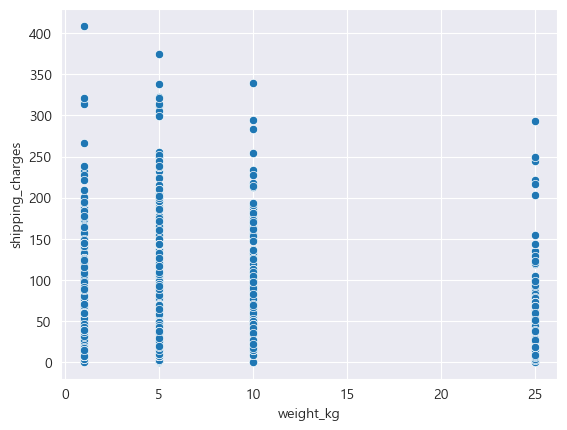

In [17]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')

In [18]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [19]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

In [20]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days

In [53]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days' # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
]

In [54]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
rscaler = RobustScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

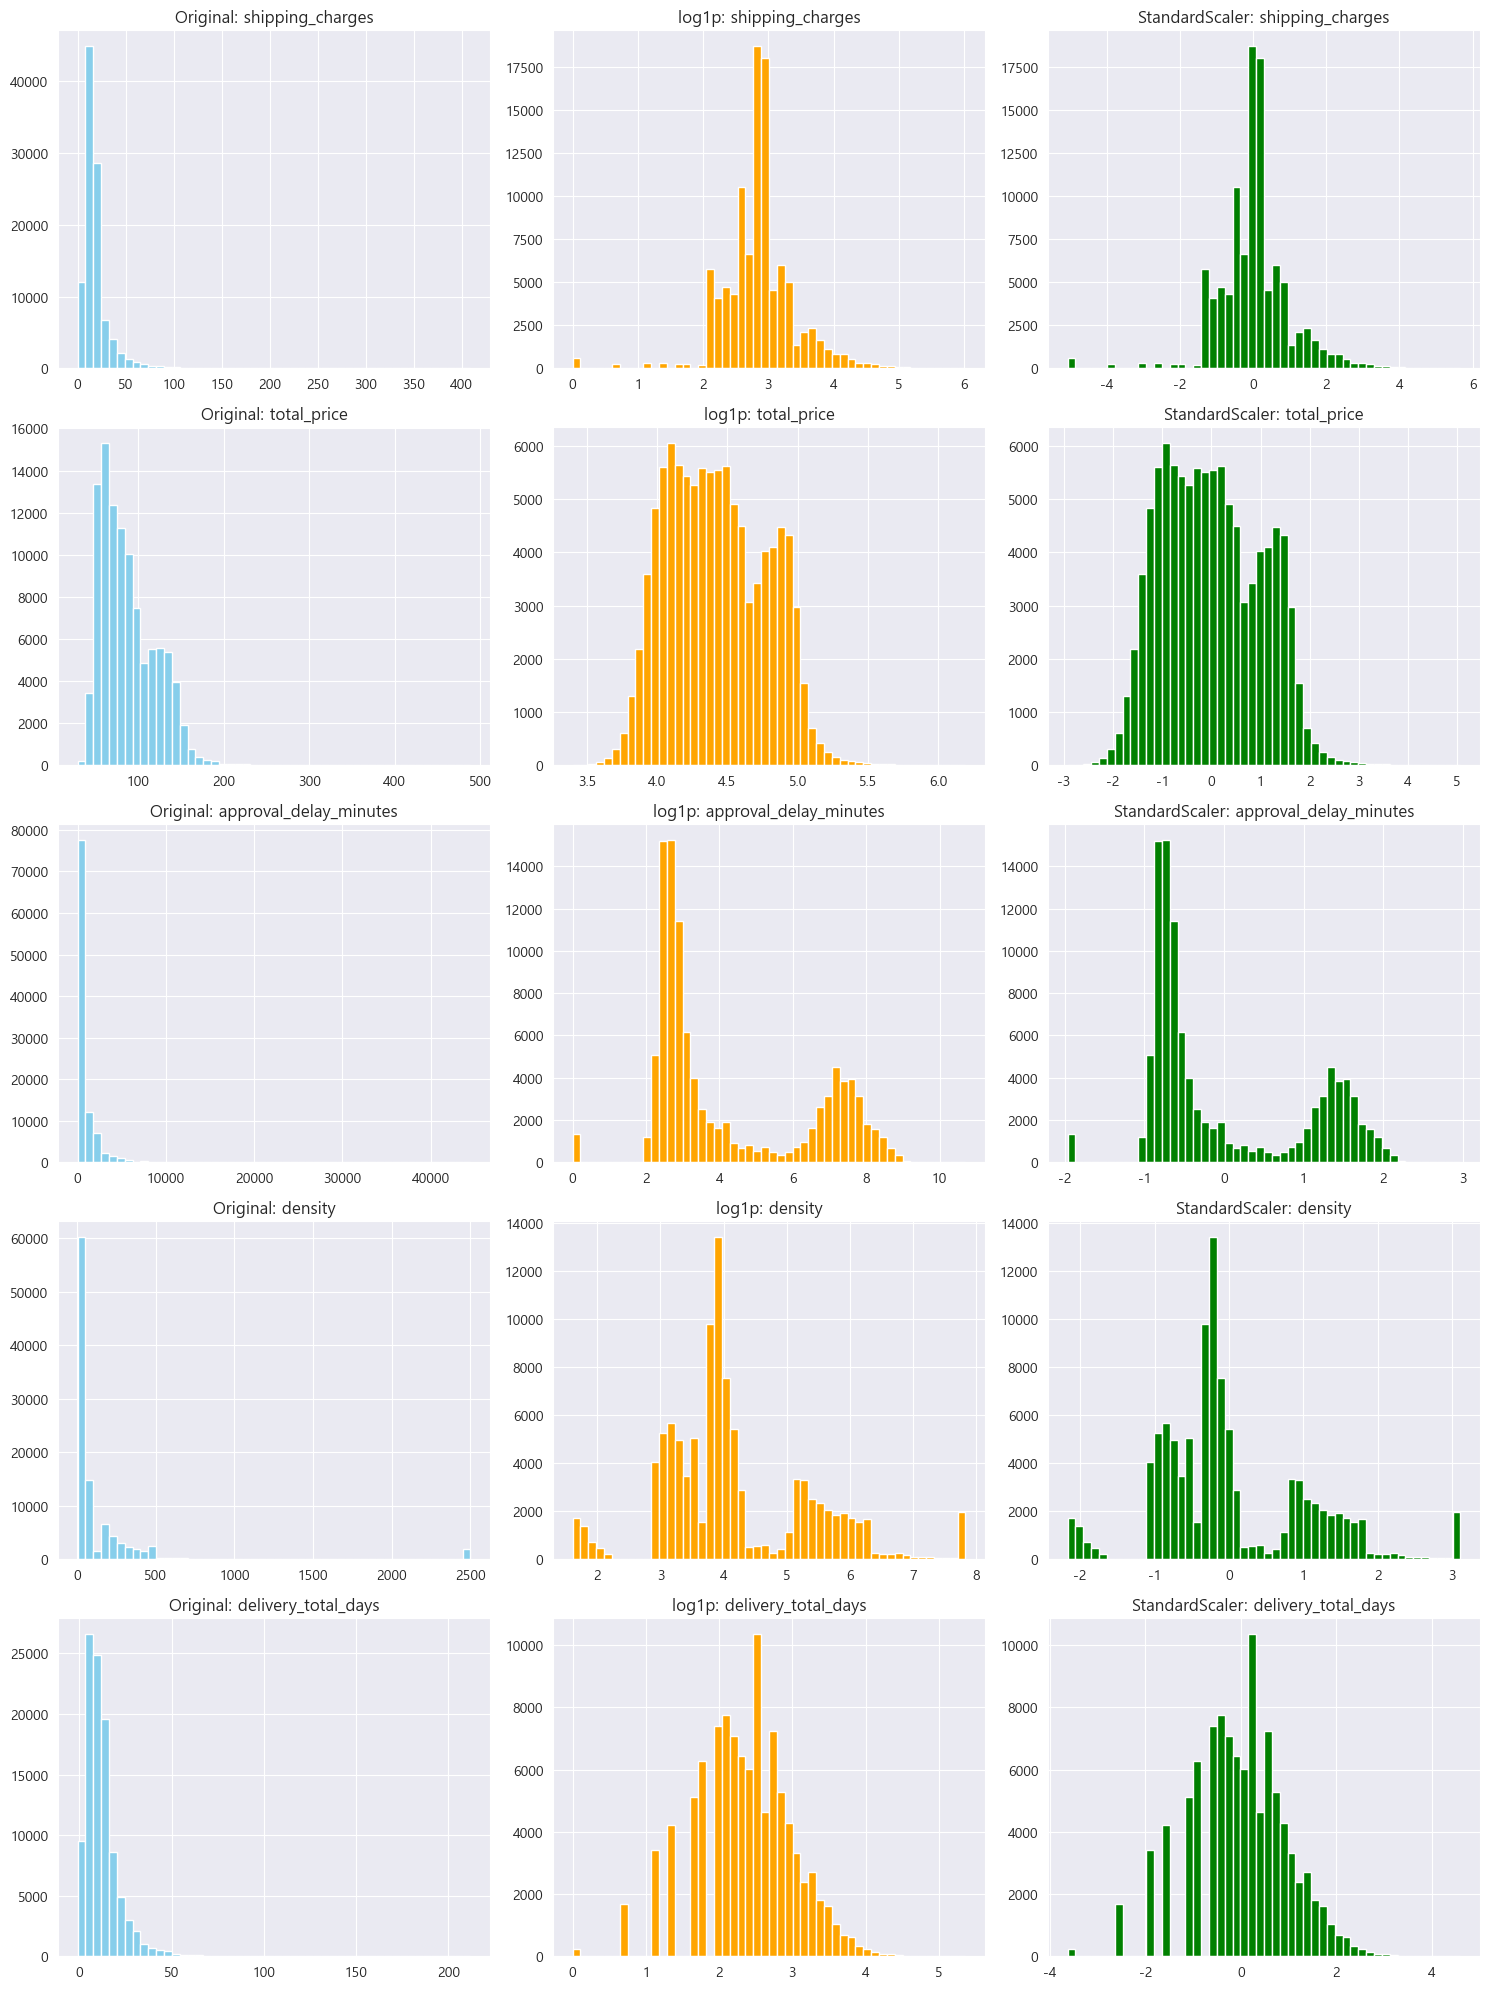

In [55]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [41]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'total_price', 'density', 'delivery_total_days', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days'], dtype='object')

In [117]:
# 목적별 클러스터링용 데이터프레임 생성
# 1_고객행동_미주 (목표: "서로 다른 구매 성향/패턴을 가진 고객들을 그룹화") / 고가/저가 구매자, 리뷰 불만족 고객 등 분류 가능
df_behavior = marketing_delivered[[
    'std_total_price', 'std_shipping_charges', 'std_payment_installments',
    'review_score'
]]

# 2_배송경험_인재 (목표: "배송 지연·체감 품질에 따른 고객 분류") / 배송 민감군 , 여유로운 고객 , 저평가 리뷰 유저 등 분류 가능
df_experience = marketing_delivered[[
    'std_delivery_delay_days', 'std_delivery_total_days', 'review_score', 'std_approval_delay_minutes'
]]

# 3_제품특성_선미 (목표: "구매 제품 유형에 따라 고객을 나눔") / 고가·대형 상품 구매자 , 소형·저가 구매자 등 분류 가능
df_product = marketing_delivered[[
    'std_density', 'std_total_price'
]]

# 4_혼합전략_상규 (고객 행동 + 배송 경험 + 제품 특성 통합 군집화) / 마케팅 타겟팅, CS 우선 대응, 리텐션 전략에 활용 가능
df_mixed = marketing_delivered[[
    'std_total_price', 'std_payment_installments',
    'std_approval_delay_minutes', 'std_delivery_total_days',
    'review_score', 'std_density'
]]

In [72]:
# 히트맵을 위한 필요한 컬럼만 추출
selected_columns = [
    'gender', 'country', 'payment_type',
    'category1', 'category2', 'review_score', 'marketing_info_agree',
    'agegroup', 'std_total_price', 'std_payment_installments',
    'std_approval_delay_minutes', 'std_delivery_delay_days',
    'std_density', 'std_delivery_total_days'
]
df_selected = marketing_delivered[selected_columns].copy()

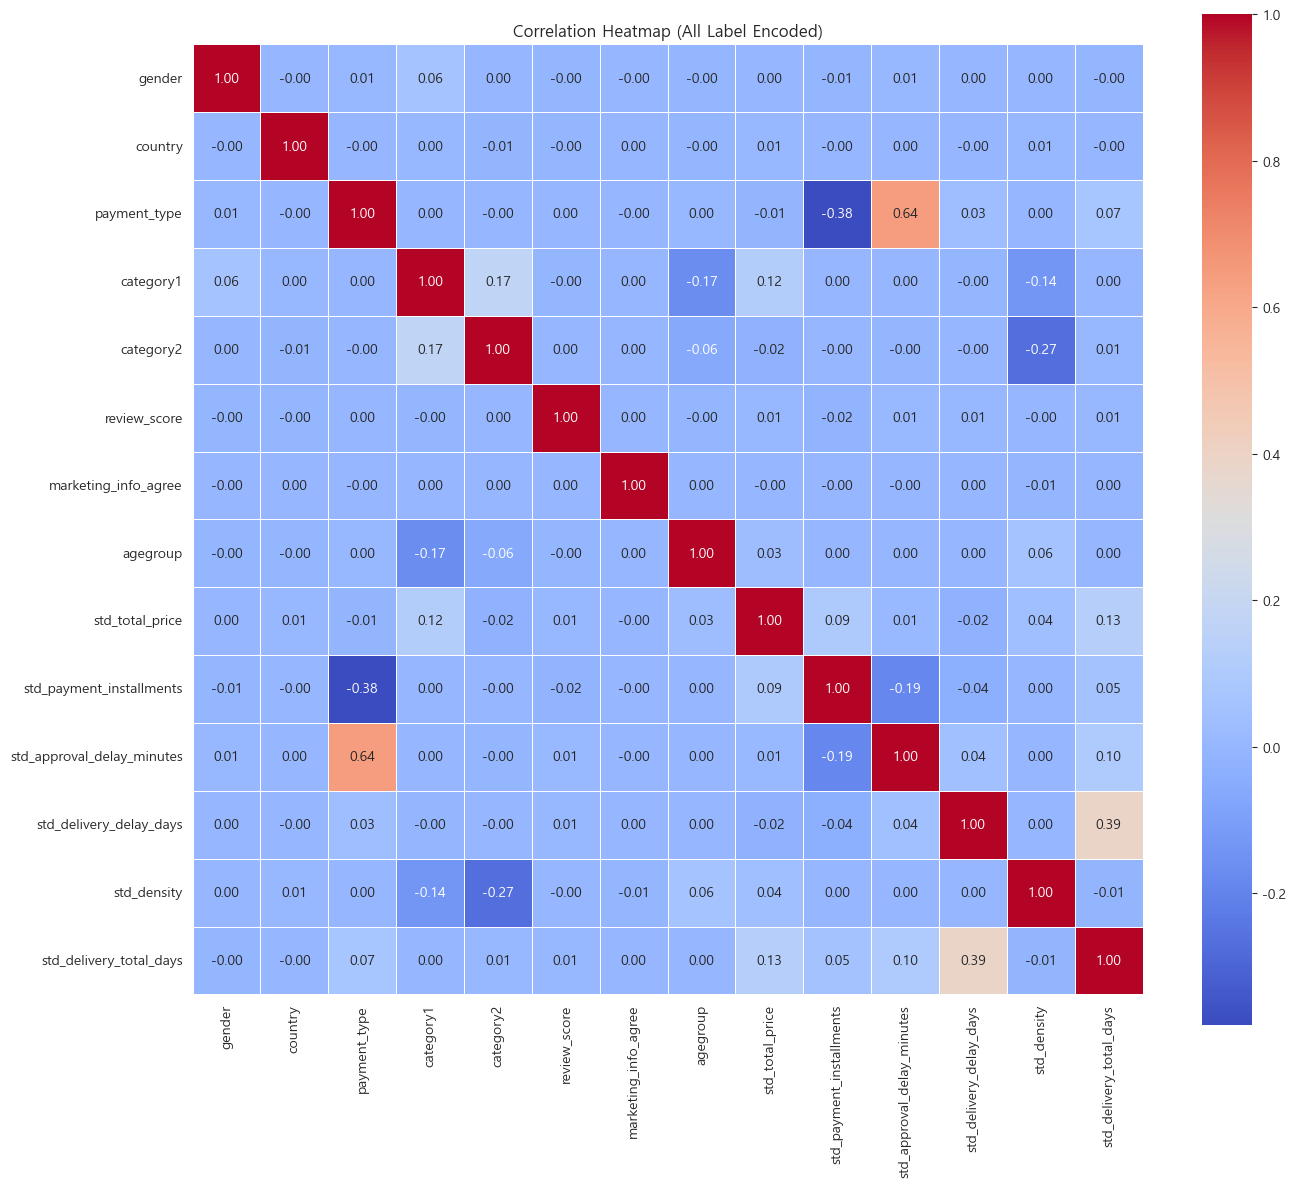

In [73]:
# Label Encoding 적용 (모든 object, category형에 대해)
for col in df_selected.columns:
    if df_selected[col].dtype == 'object' or str(df_selected[col].dtype).startswith('category'):
        df_selected[col] = df_selected[col].astype('category').cat.codes

# 상관관계 히트맵
plt.figure(figsize=(14, 12))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (All Label Encoded)")
plt.tight_layout()
plt.show()

In [74]:
df_mixed.isnull().sum()

std_total_price               0
std_payment_installments      0
std_approval_delay_minutes    0
std_delivery_total_days       0
review_score                  0
std_density                   0
dtype: int64

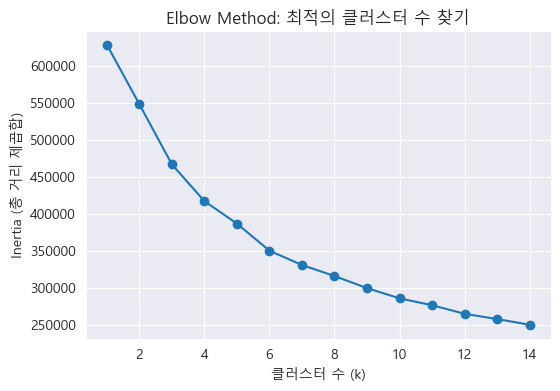

In [118]:
# Elbow Method: 최적의 클러스터 수 찾기
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mixed)
    inertia.append(kmeans.inertia_)

# Elbow 시각화
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: 최적의 클러스터 수 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Inertia (총 거리 제곱합)")
plt.grid(True)
plt.show()

In [119]:
# 고객 세그멘테이션 (KMeans 클러스터링)
df_mixed = df_mixed.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df_mixed.loc[:, 'Cluster'] = kmeans.fit_predict(df_mixed)

In [120]:
# 군집별 샘플 수
df_mixed['Cluster'].value_counts().sort_index()

Cluster
0    54497
1    29394
2    18725
Name: count, dtype: int64

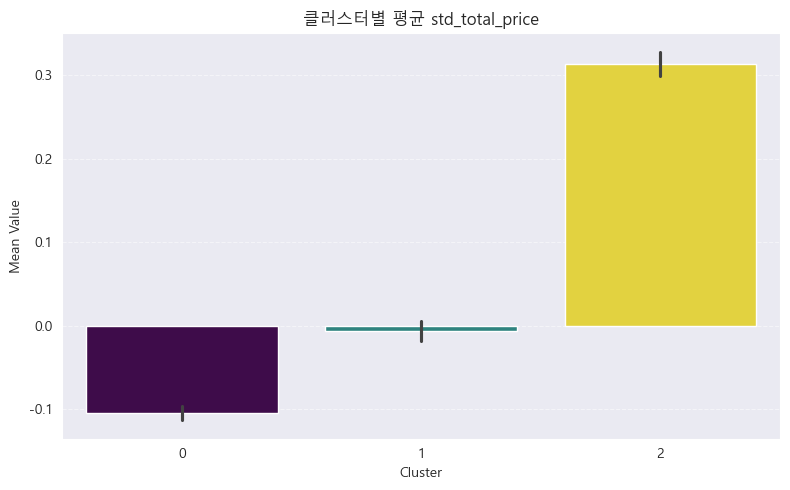

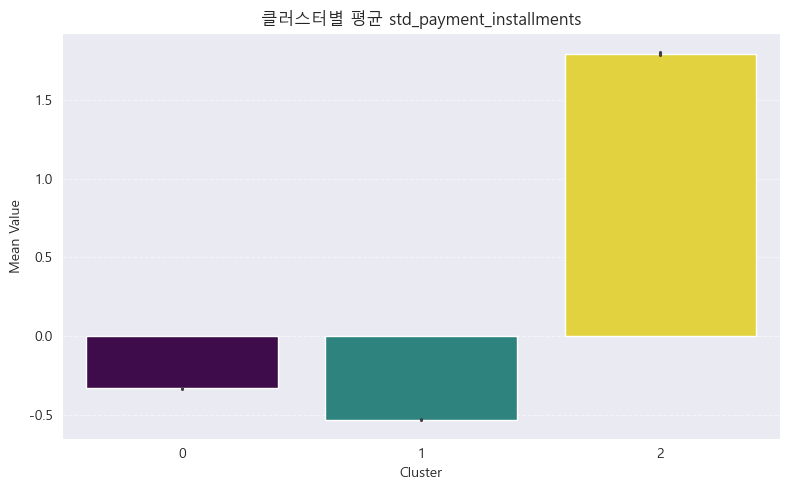

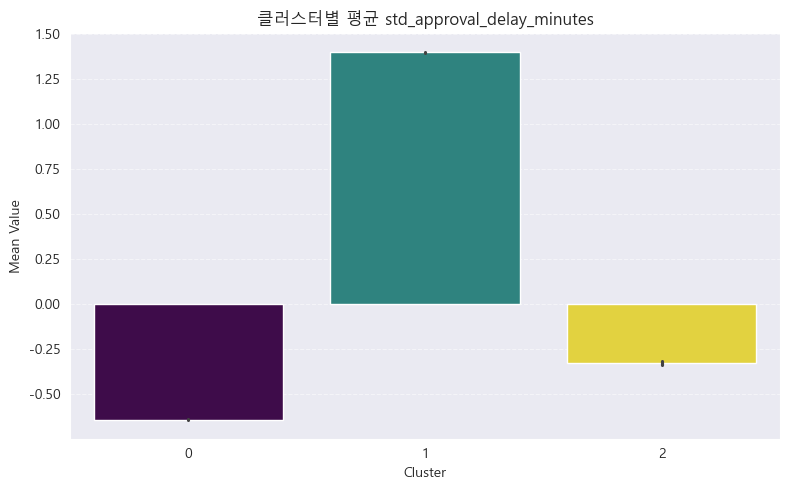

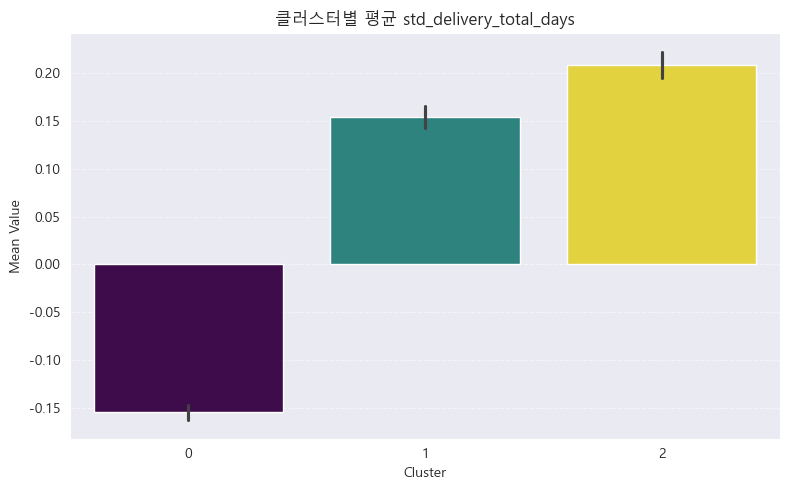

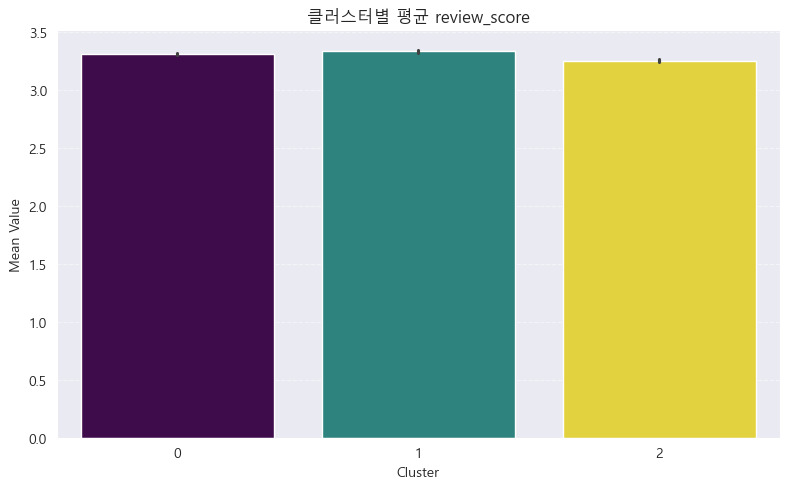

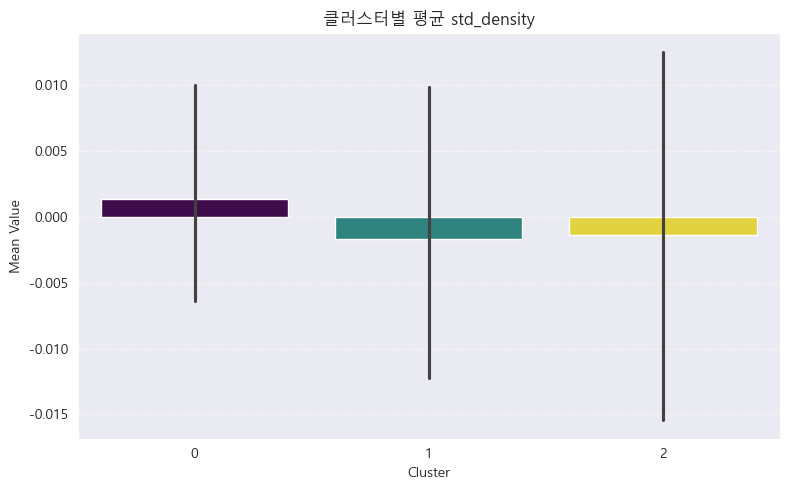

In [121]:
# 클러스터별 평균값 바 차트 시각화
# 클러스터 컬럼이 있는 경우, 그 외 수치형 컬럼만 선택
numeric_cols = df_mixed.select_dtypes(include='number').drop(columns='Cluster', errors='ignore').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_mixed, x='Cluster', y=col, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'클러스터별 평균 {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [122]:
# 군집별 평균 값보기
cluster_profile = df_mixed.groupby('Cluster').mean().round(2)
print(cluster_profile)

# 클러스터 0 중간 특성의 일반 고객 / 베이스라인 군집
# 클러스터 1 승인 지연이 많은 고객층 / 배송 이슈 개선 필요?
# 클러스터 2 고가 + 할부 고객층 / 프리미엄 타겟 마케팅 가능

# density의미 없어 보임

         std_total_price  std_payment_installments  std_approval_delay_minutes  std_delivery_total_days  review_score  std_density
Cluster                                                                                                                           
0                  -0.10                     -0.33                       -0.64                    -0.15          3.31          0.0
1                  -0.01                     -0.53                        1.40                     0.15          3.33         -0.0
2                   0.31                      1.79                       -0.33                     0.21          3.25         -0.0


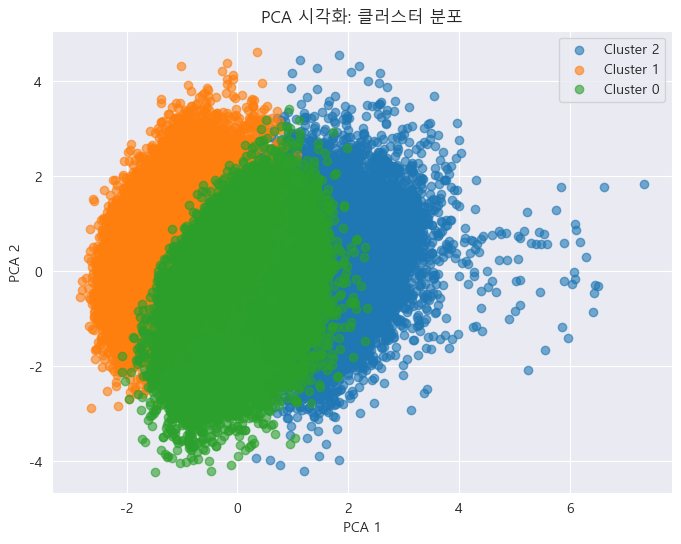

In [123]:
# 2D 시각화를 위한 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_mixed.drop('Cluster', axis=1))

df_mixed.loc[:, 'pca1'] = pca_result[:, 0]
df_mixed.loc[:, 'pca2'] = pca_result[:, 1]

# 산점도 시각화
plt.figure(figsize=(8, 6))
for cluster_id in df_mixed['Cluster'].unique():
    subset = df_mixed[df_mixed['Cluster'] == cluster_id]
    plt.scatter(subset['pca1'], subset['pca2'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.legend()
plt.title('PCA 시각화: 클러스터 분포')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

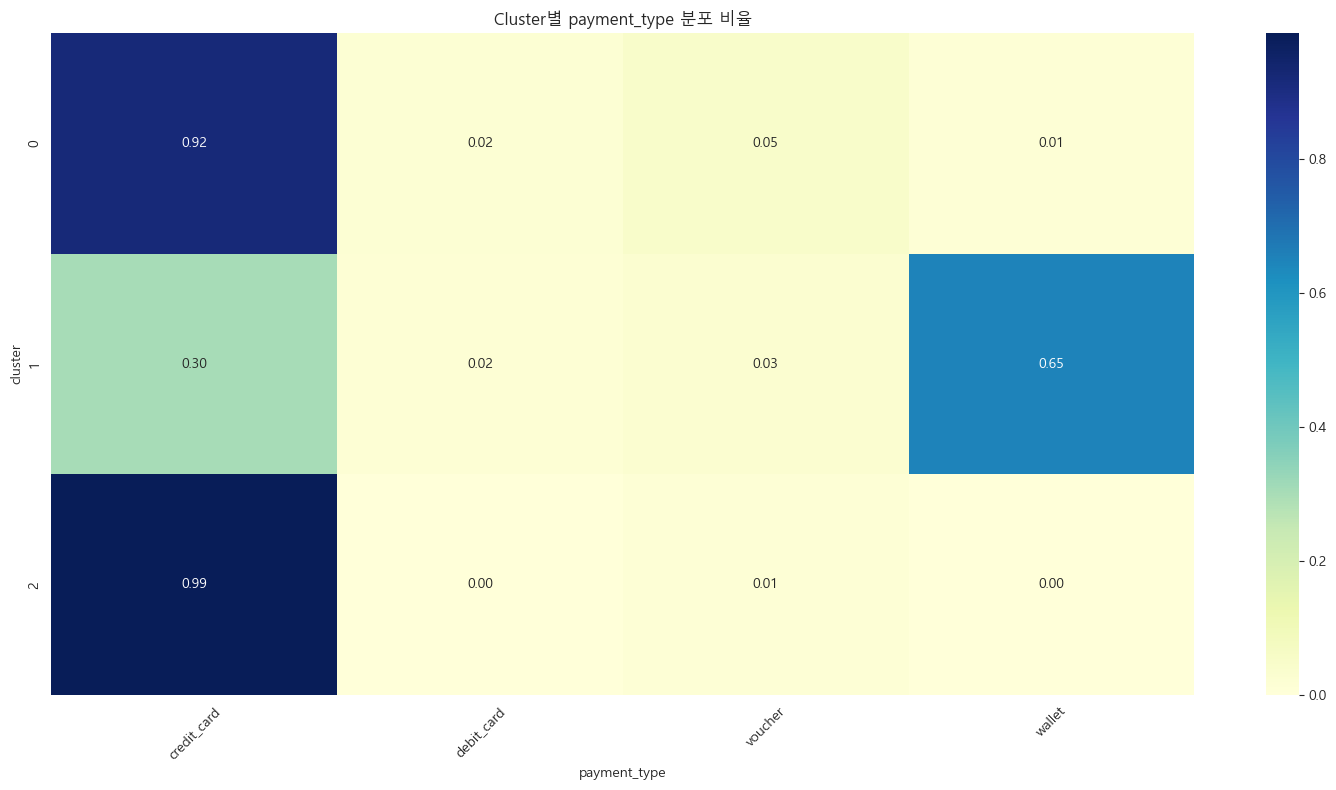

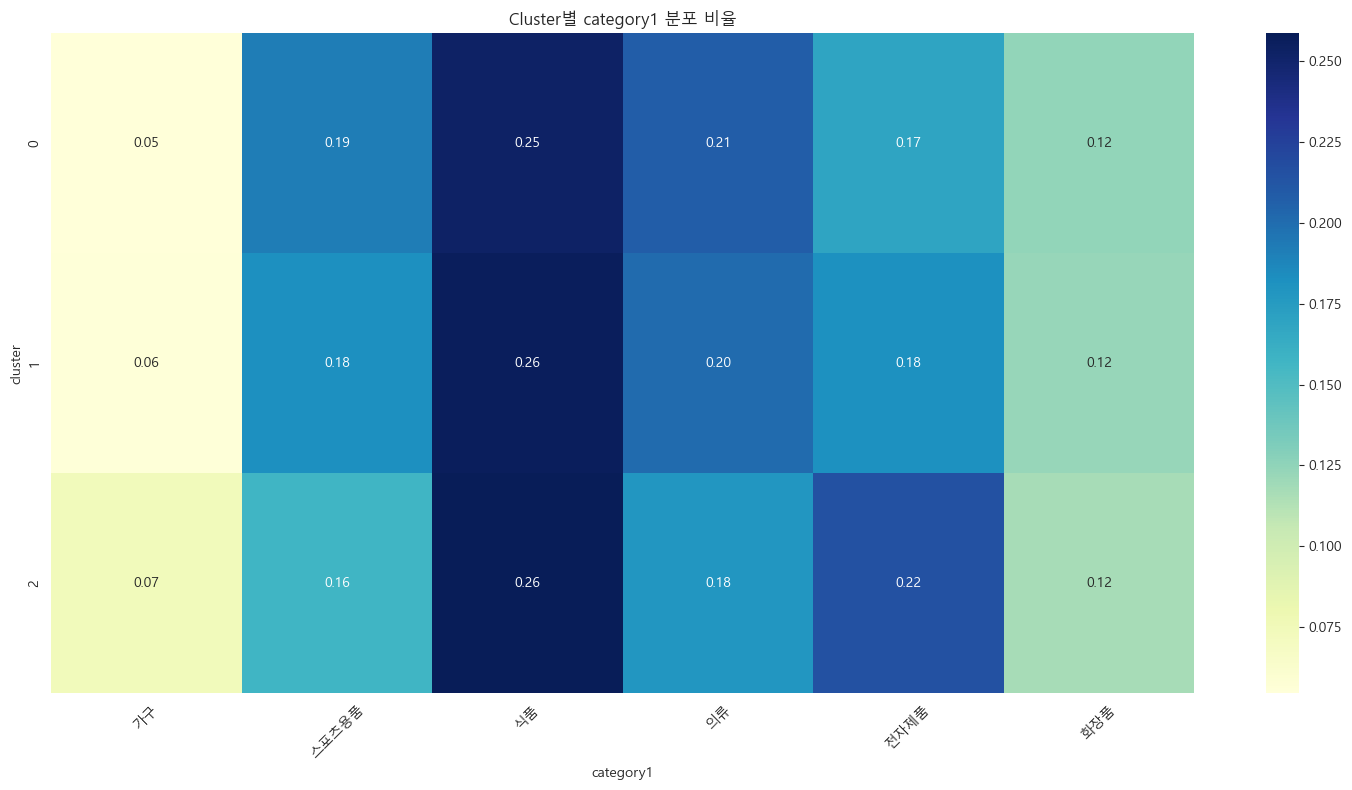

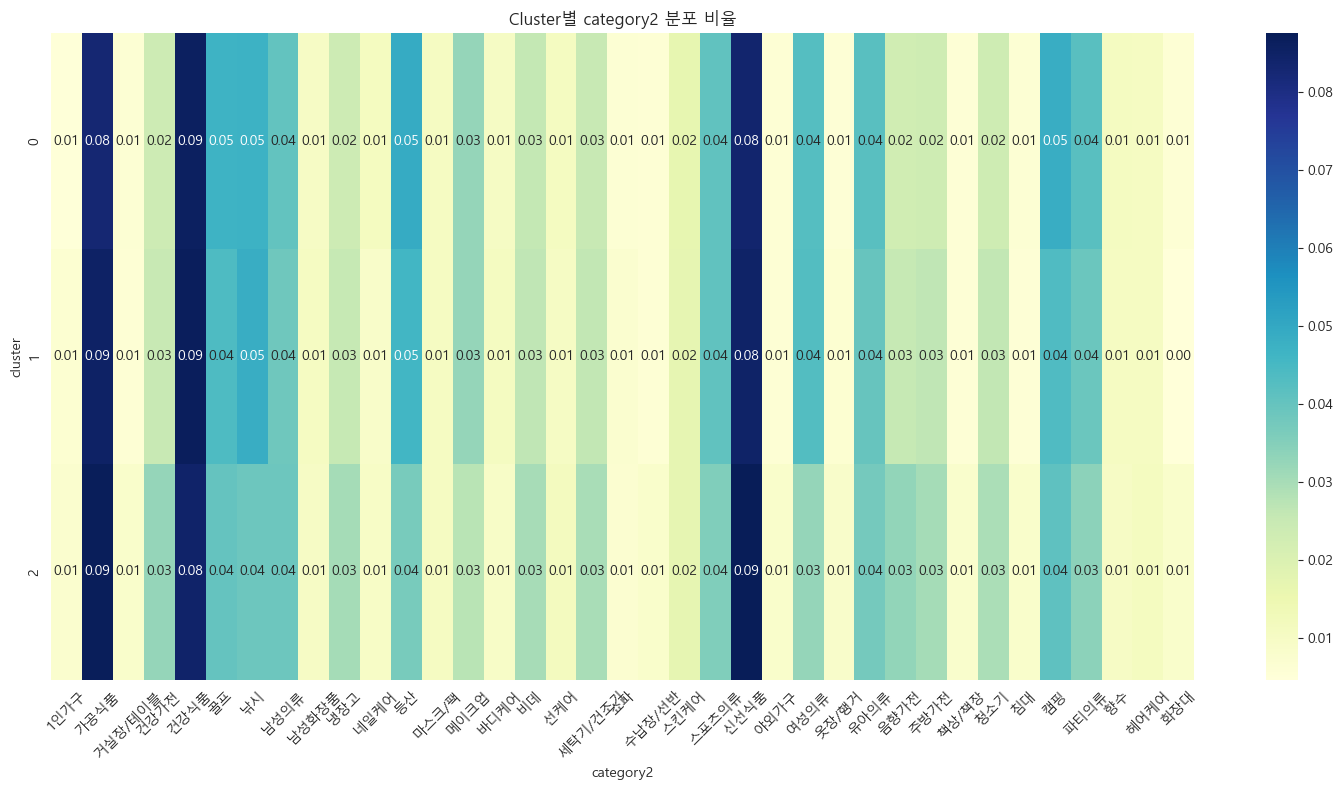

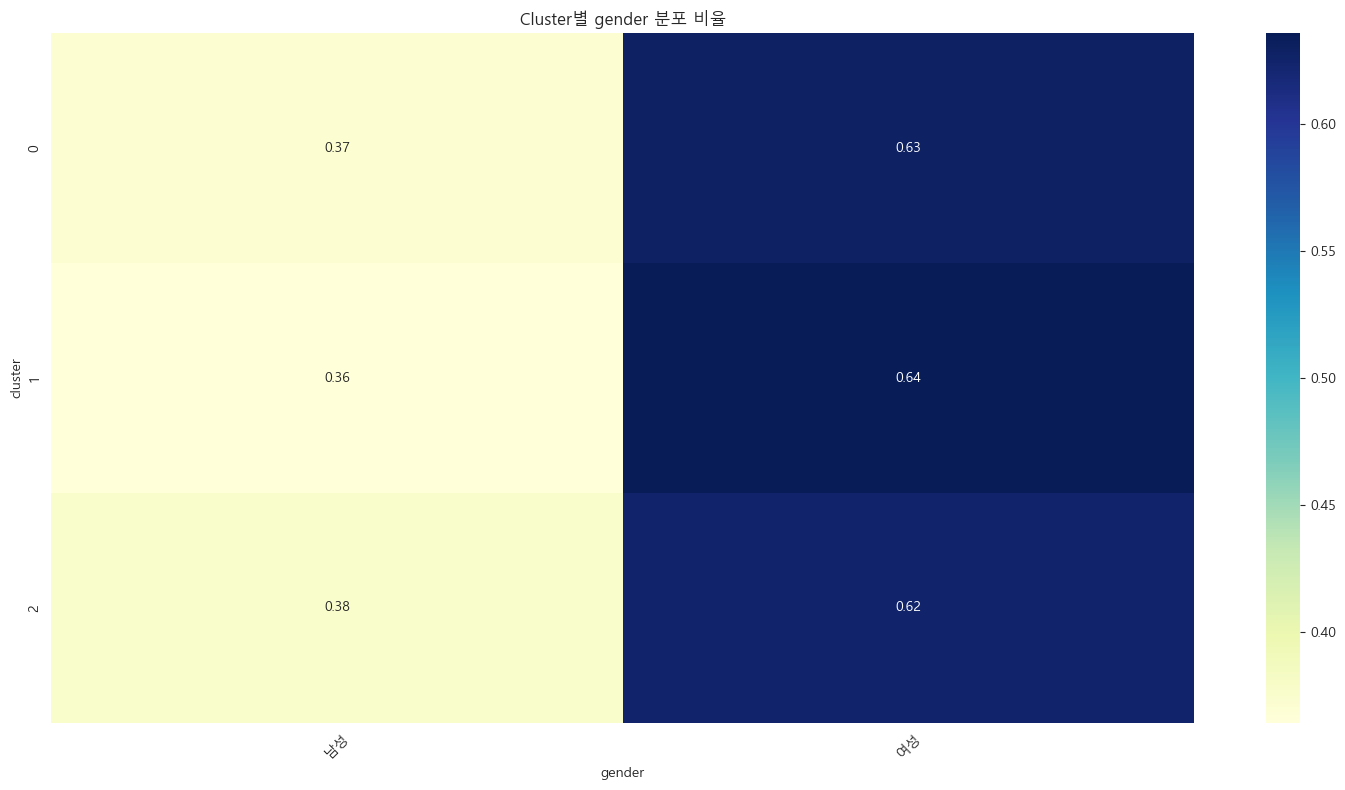

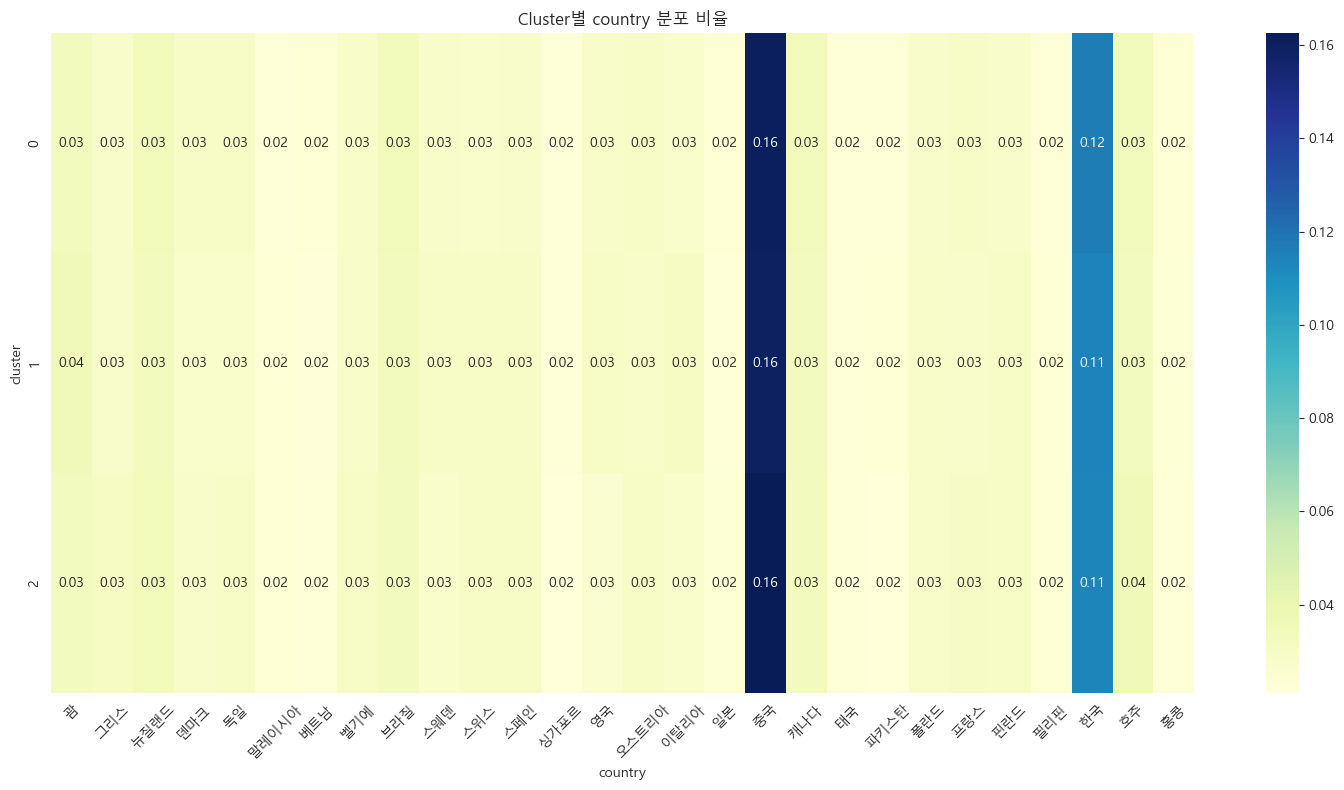

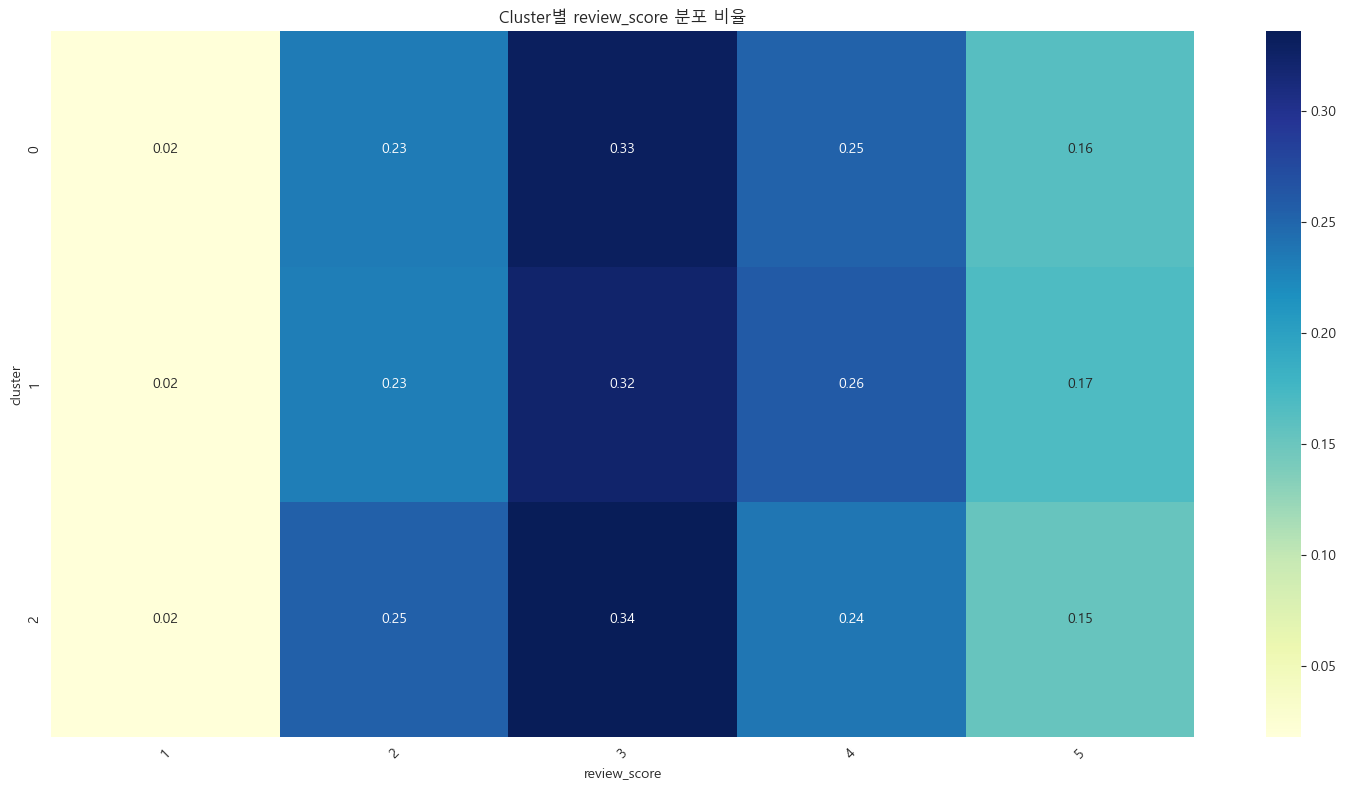

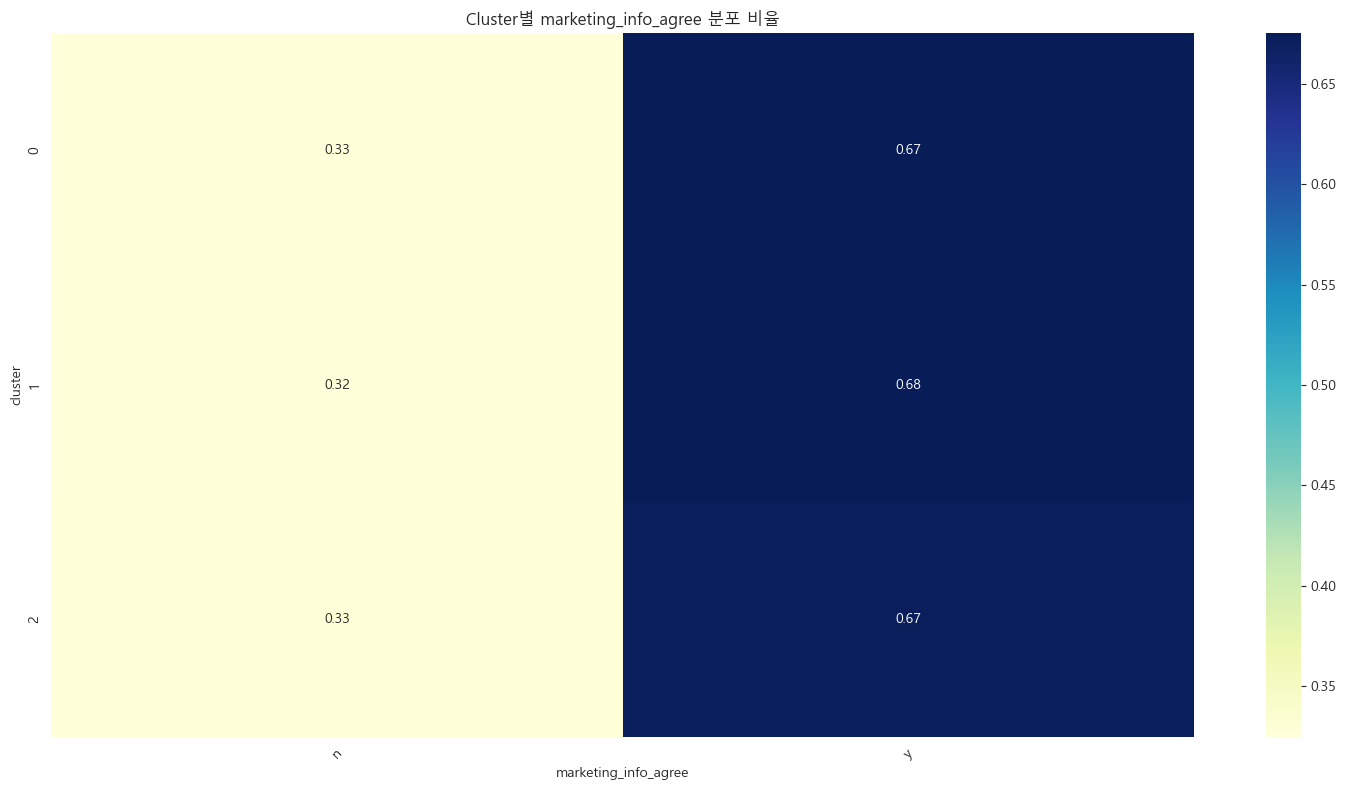

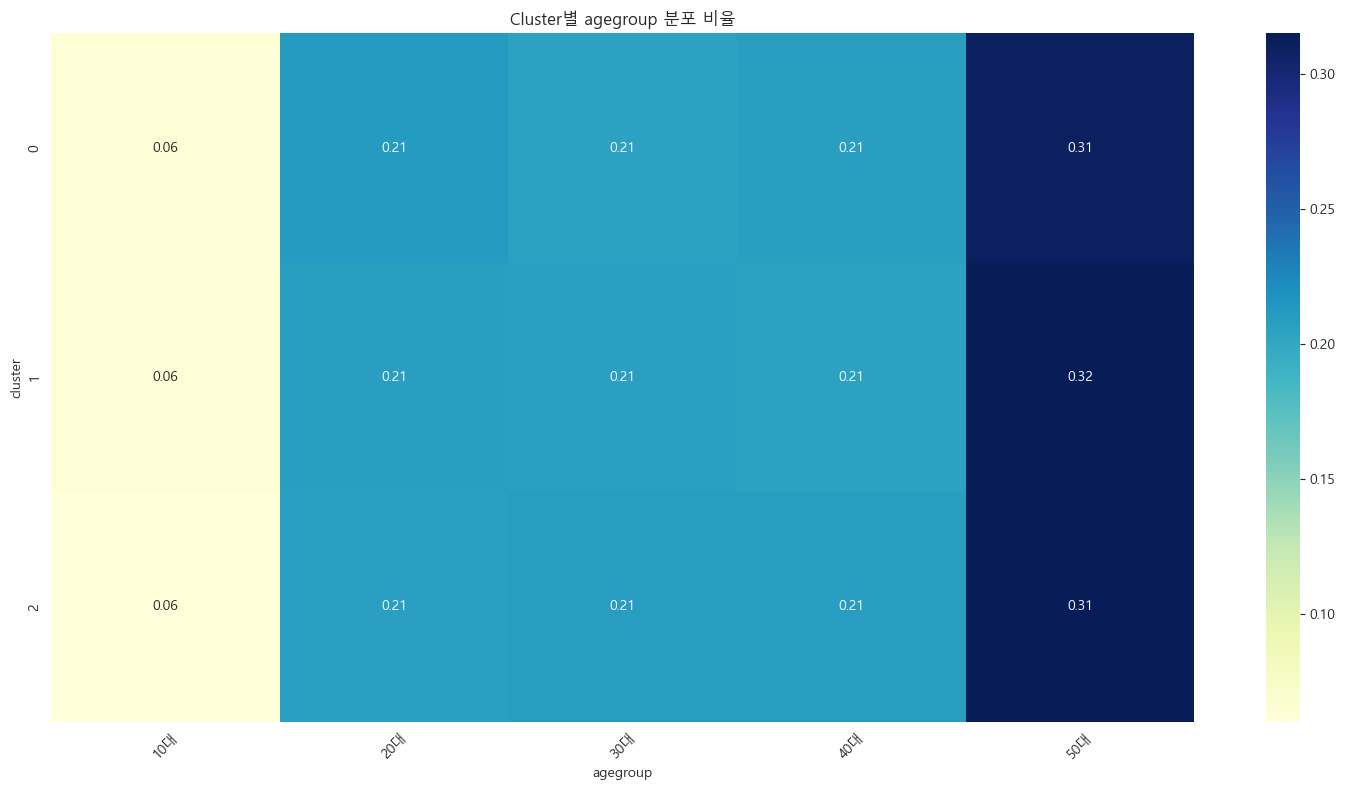

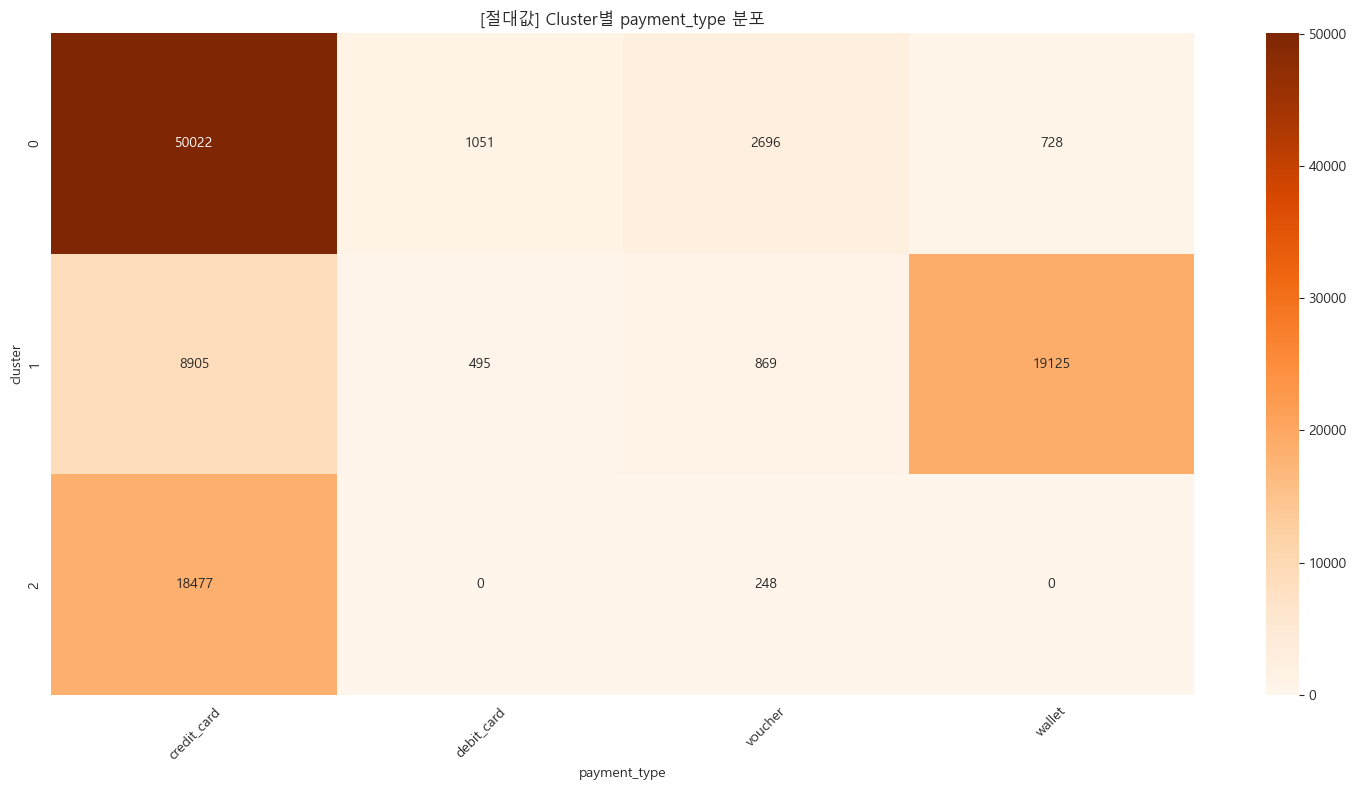

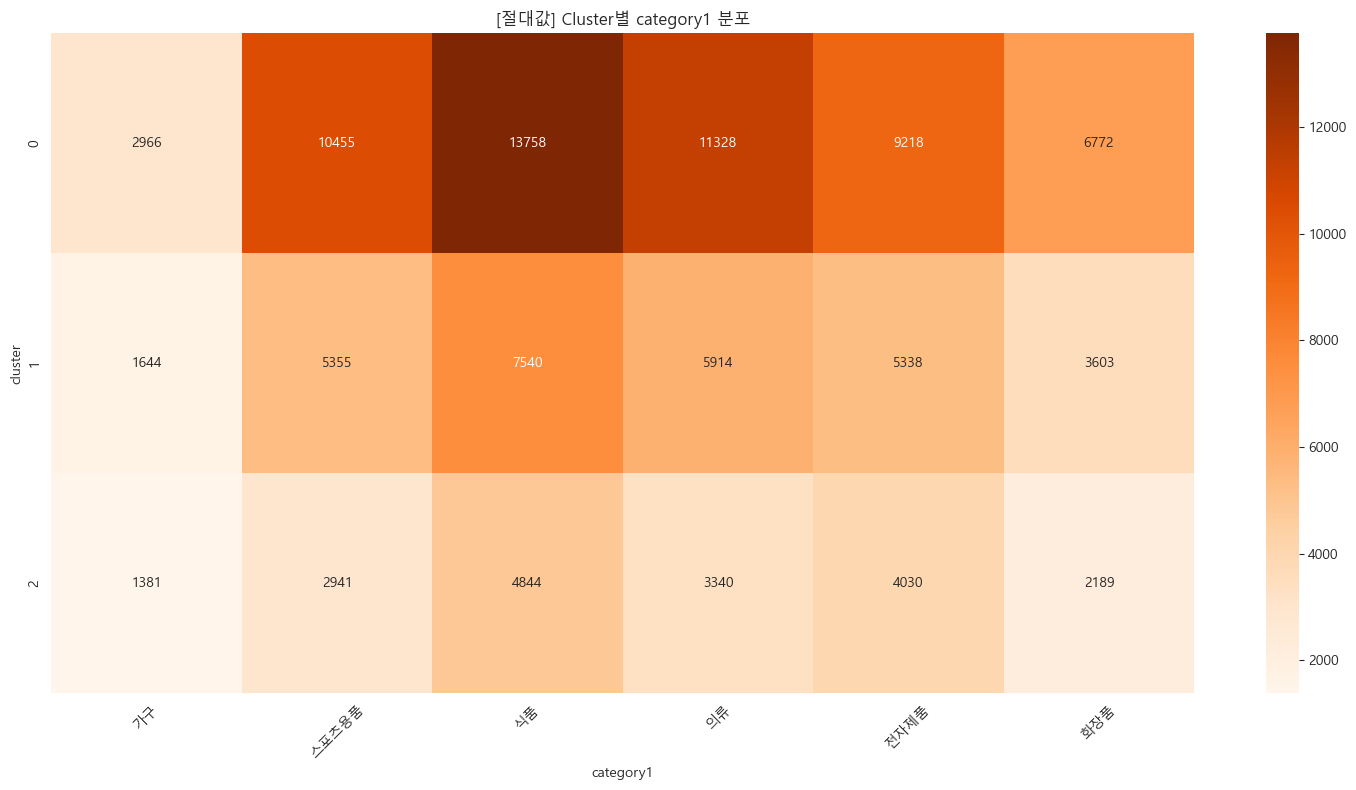

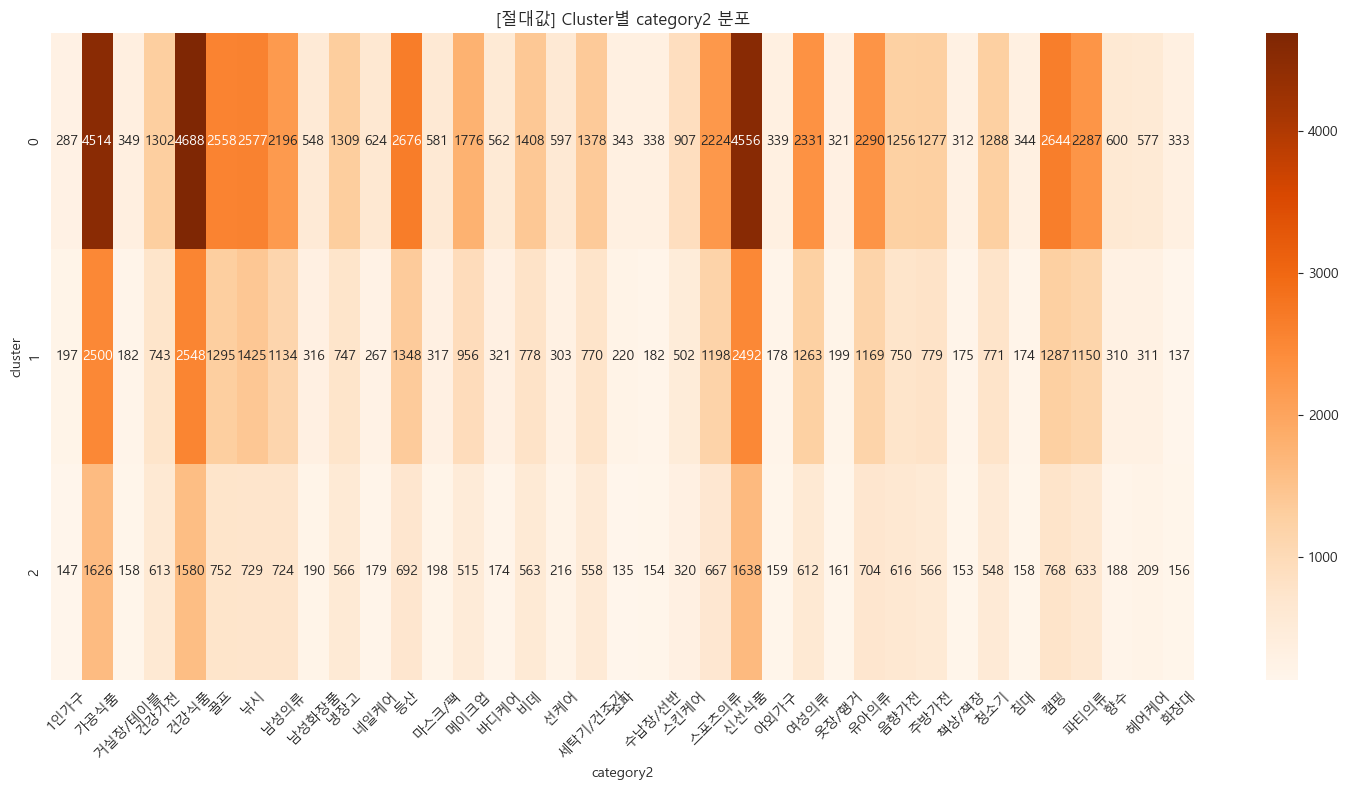

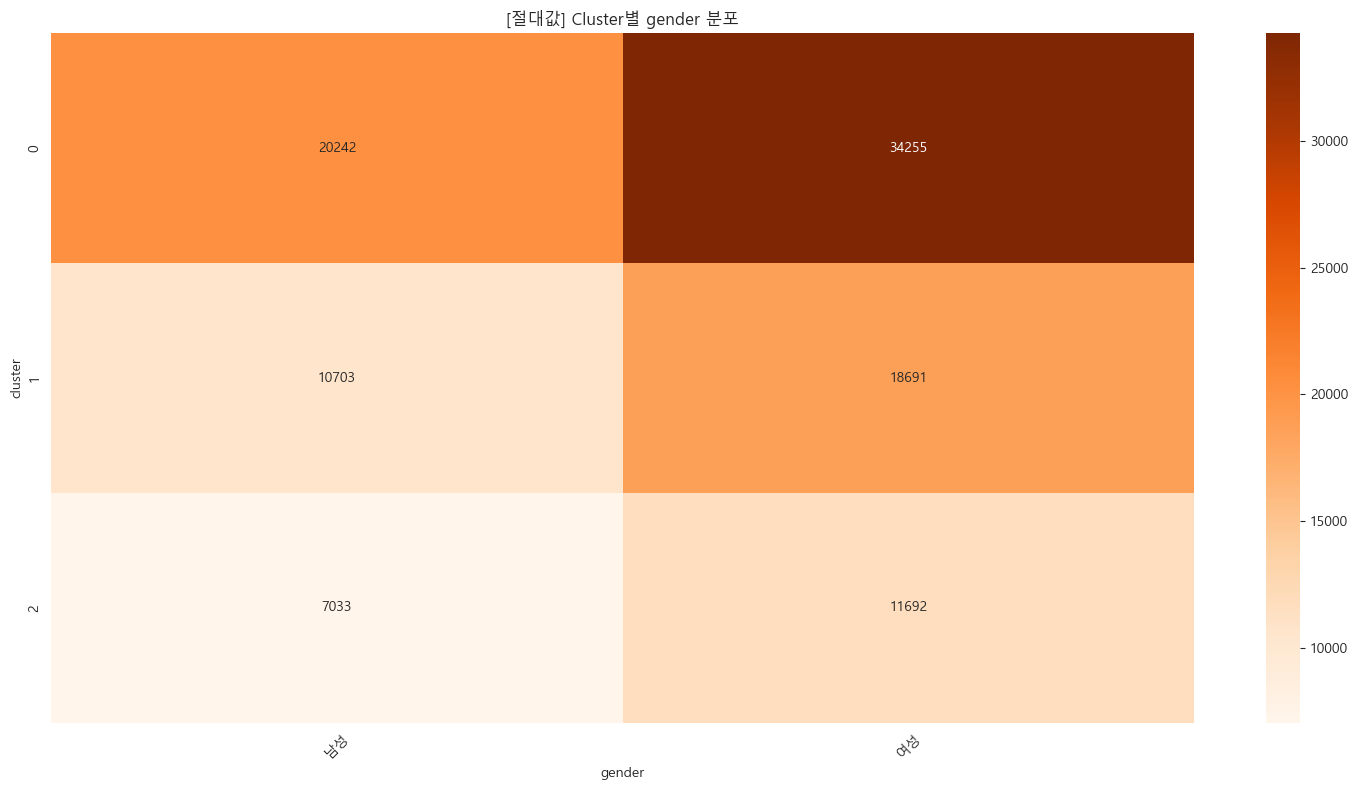

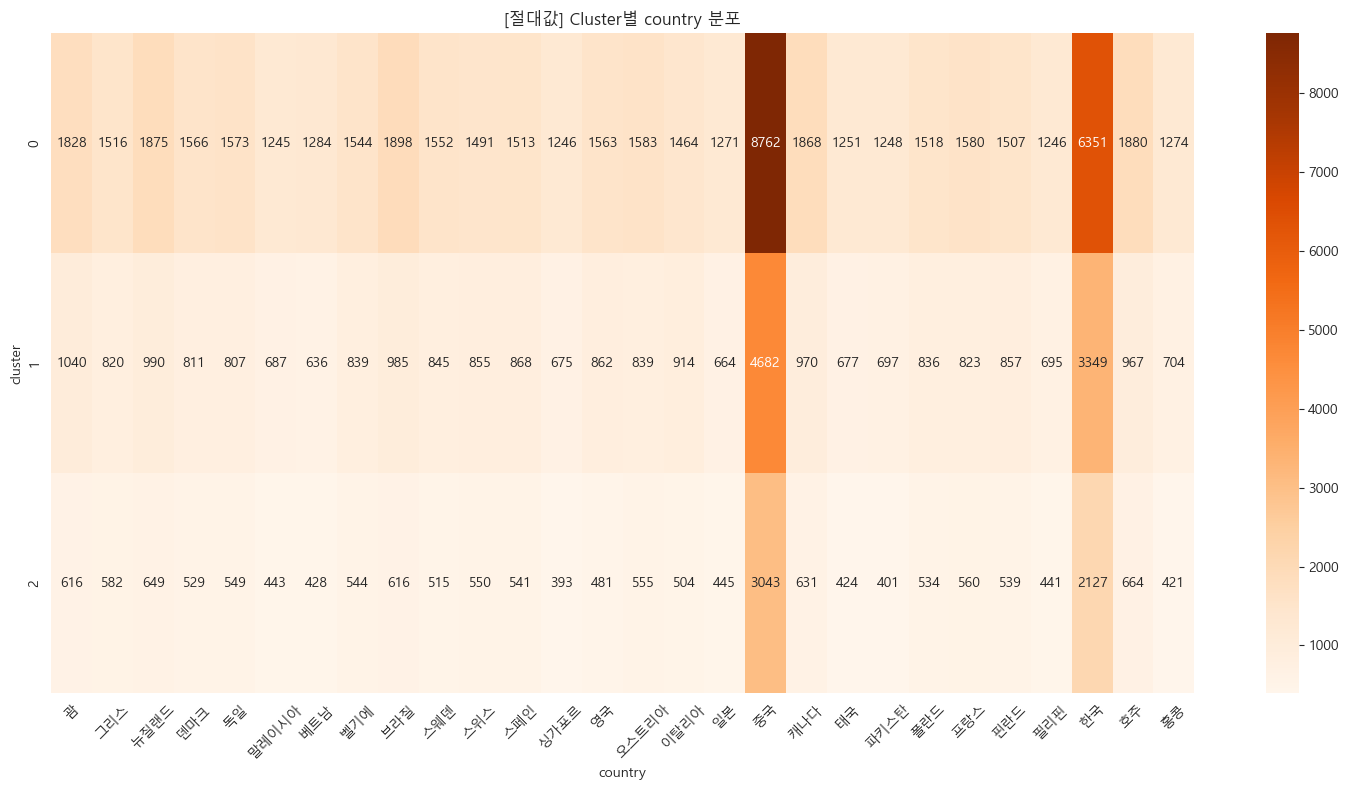

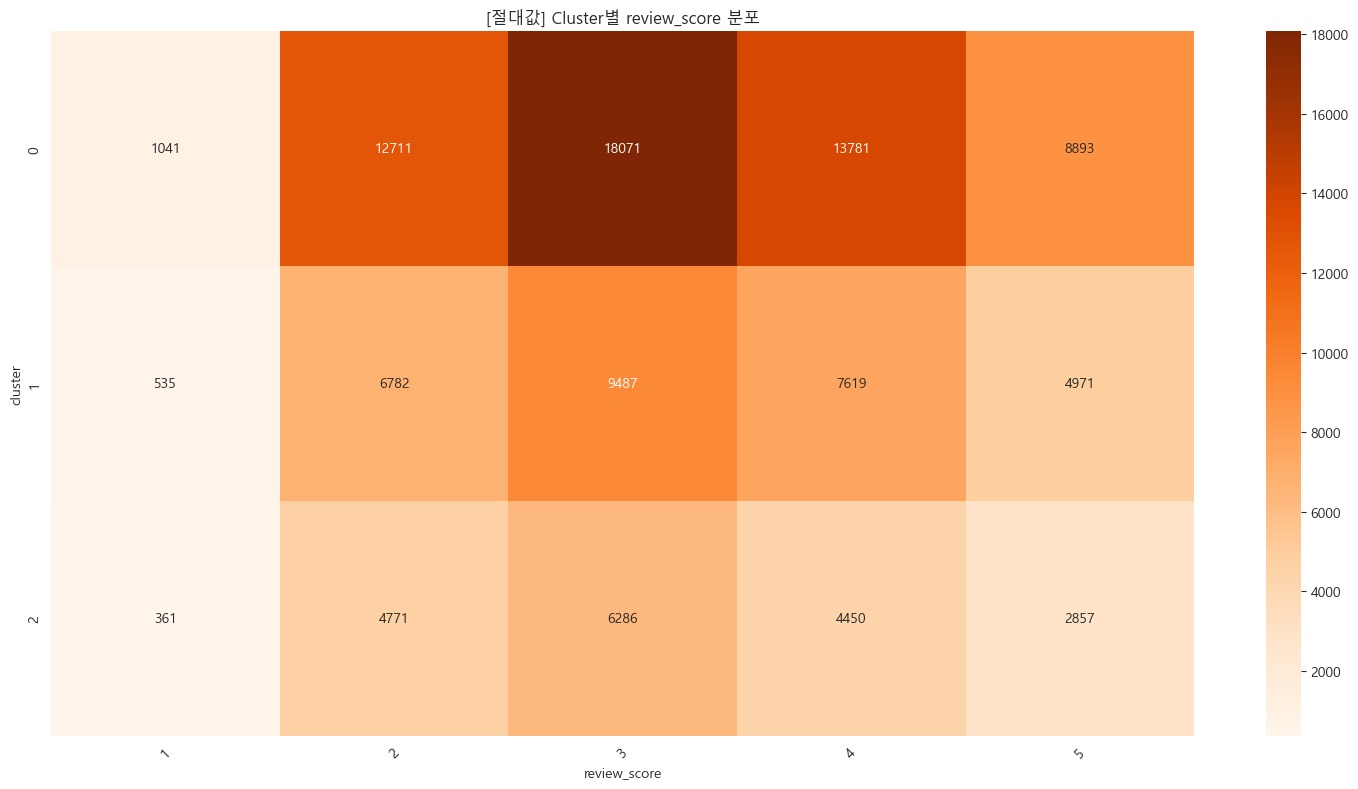

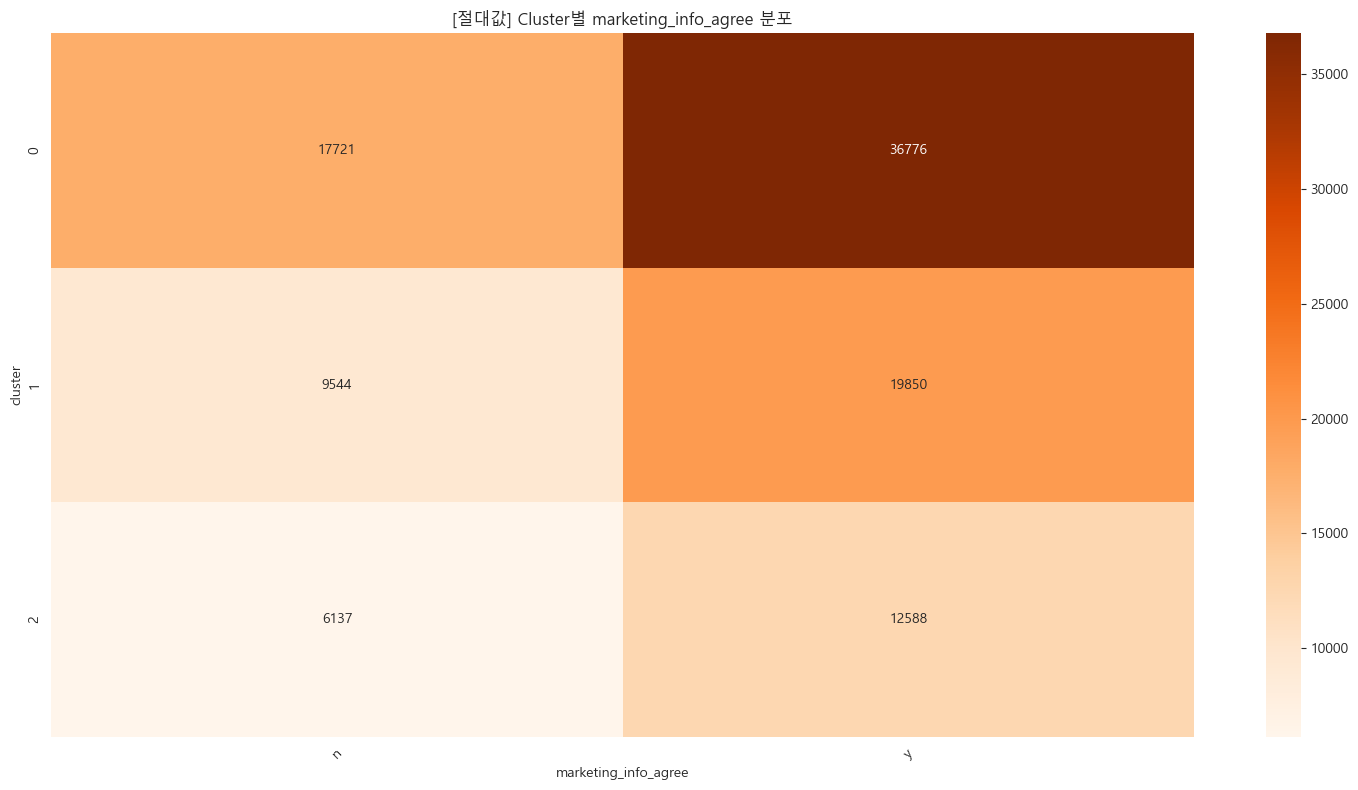

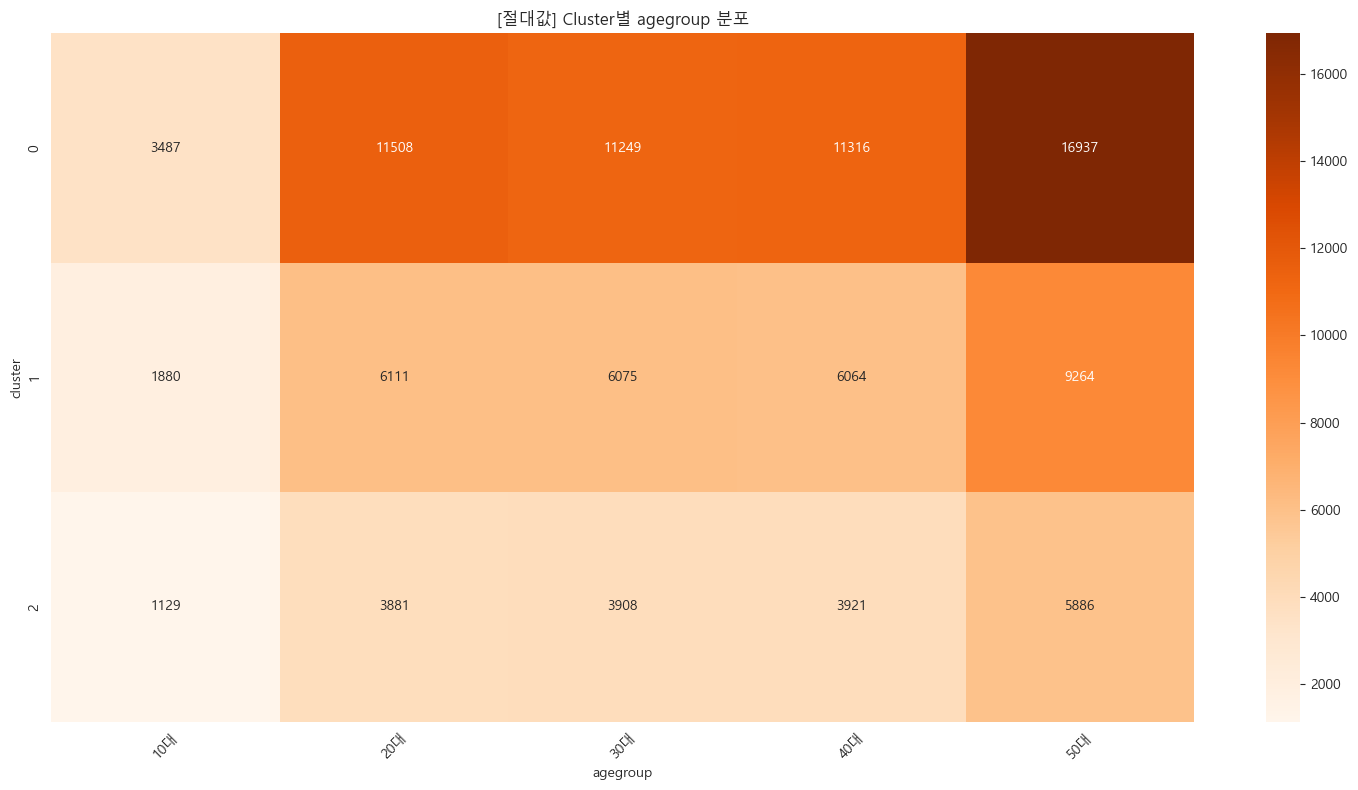

In [95]:
# 클러스터 라벨 붙여진 df_mixed 기준으로 병합
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_mixed['Cluster'].values

cols = [
    'payment_type', 'category1', 'category2',
    'gender', 'country', 'review_score',
    'marketing_info_agree', 'agegroup'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'Cluster별 {col} 분포 비율')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col])
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
    plt.title(f'[절대값] Cluster별 {col} 분포')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Cluster 0

고객 수 (대략):	가장 많음

주요 결제수단:	    신용카드 중심

주요 카테고리:	    의류, 쇼핑, 스포츠용품

Cluster 1

고객 수 (대략):	중간

주요 결제수단:	    Wallet 중심

주요 카테고리:	    의류, 쇼핑, 전자제품

Cluster 2

고객 수 (대략):	적음

주요 결제수단:	    신용카드 중심

주요 카테고리:	    가구, 전자, 1인가구

In [124]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df


,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,4580713.11,84.054409,54497,50119,91.396738,1.087352
1,1,2565384.34,87.275782,29394,27364,93.750341,1.074185
2,2,1836342.45,98.069023,18725,16900,108.659317,1.107988


Cluster 0

LTV 91 재구매율 1.08

Cluster 1

LTV 93 재구매율 1.07

Cluster 2

LTV 108 재구매율 1.1

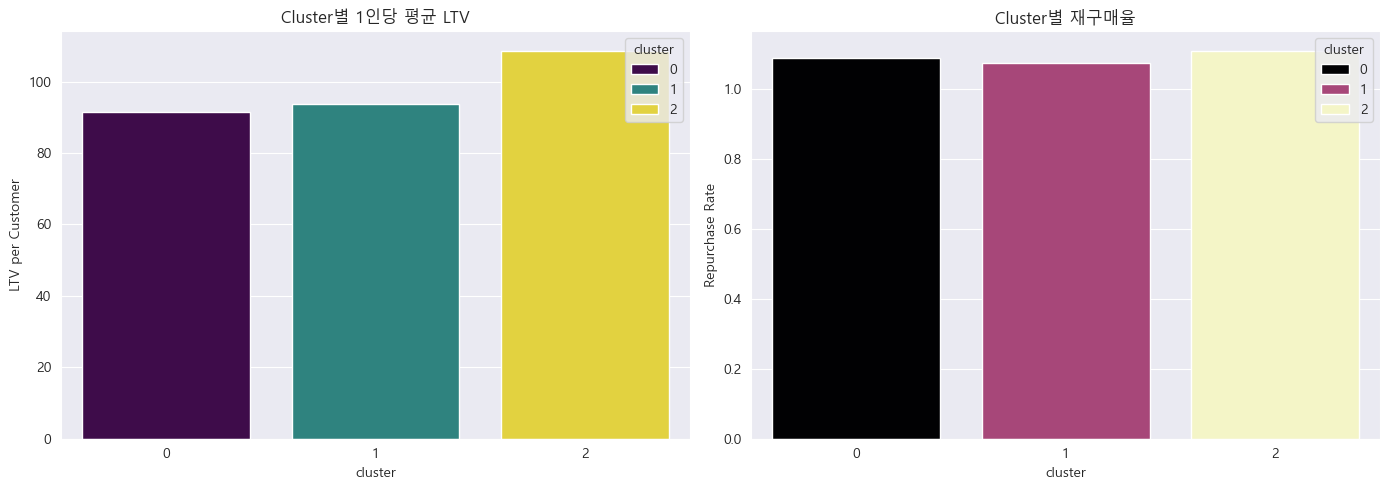

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

Cluster 0 고객 특성 요약

일반 상품 중심, 낮은 재구매율

마케팅 전략

진입 고객 유입 후 이탈 방지 전략 필요 (예: 번들 할인, 재구매 유도 쿠폰)

1. 재구매 유도 필요
2. 번들/묶음 할인, 쿠폰 제공

Cluster 1 고객 특성 요약

모바일 결제 비중, 의류/쇼핑 집중

마케팅 전략

리텐션 마케팅 적합 (예: 푸시 알림, 마케팅 동의 기반 혜택 강화)

1. 충성도 상승 여지 있음
2. 마케팅 동의 고객 대상 타겟 프로모션

Cluster 2 고객 특성 요약

평균 LTV와 재구매율 모두 높음, 가구/전자 등 고가 제품 중심

마케팅 전략

프리미엄 혜택 제공, VIP 관리 대상

1. 프리미엄 관리 대상
2. 전용 고객센터, 사후관리 강화